In [ ]:
#Importing Libraries

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math
from sklearn import linear_model
import statsmodels.api as sm
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.feature_selection import RFE
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Importing Data Set for Part 1

In [400]:
Test = pd.read_csv('test_set.csv')
Train = pd.read_csv('training_set.csv')

X_test = pd.DataFrame(Test['GRE Score'])
Y_test = Test.Chance_of_Admit
X_train = pd.DataFrame(Train['GRE Score'])
Y_train = Train.Chance_of_Admit

In [ ]:
#Functions for 1.1, 1.2, 1.3 used as it is for 2.3

In [415]:
def error_function(y_actual,y_predicted):
    error = 0
    for i in range(0,len(y_actual)):
        error =  error + pow((y_actual[i] - y_predicted[i]),2)
        return error/(2*len(y_actual))

def y_predicted(w,x):
    y_pred = np.zeros(len(x))
    for i in range(0,len(x)):
        for j in range(0,len(w)):
            y_pred[i] = y_pred[i]+(w[j]*x[i][j] + w[-1])
    return y_pred

def gradient_descent(y_actual,y_pred,x):
    grad = np.zeros(x.shape[1])
    for i in range(x.shape[1]):
        for j in range(0,len(y_actual)):
            grad[i] = - (y_actual[j] - y_pred[j])*x[j][i] + grad[i]
    return grad/len(y_actual)


def weights(x_train,y_train,num_iterations,learning_rate):
    no_of_rows = x_train.shape[0]
    no_of_columns = x_train.shape[1]
    new_x_train = np.ones((no_of_rows,no_of_columns+1))
    new_x_train[:,0 :no_of_columns] = x_train
    w = np.zeros(no_of_columns)
    w =np.append(w,1)
    for i in range(0,num_iterations):
        y_pred = y_predicted(w,new_x_train)
        error = error_function(y_train,y_pred)
        MSE_points.append(error)
        grad = gradient_descent(y_train,y_pred,new_x_train)
        w = w - learning_rate*grad
        learning_rate = learning_rate/1.05                            
    return w

def regression_test(x_test,w):
    row = x_test.shape[0]
    column = x_test.shape[1]
    new_x_test = np.ones((row,column+1))
    new_x_test[:,0:column] = x_test
    y_pred = y_predicted(w,new_x_test)
    return(y_pred)

In [3]:
#Standardizing Data for Part 1

In [327]:
X_train_standardized = (X_train - X_train .mean()) / X_train.std()
X_test_standardized  = (X_test - X_train.mean()) /  X_train.std()

In [ ]:
#Implementation of 1.1, 1.2, 1.3

In [408]:
MSE_points = []
num_iterations = 300
learning_rate = 0.1
w = weights(X_train_standardized,Y_train,num_iterations,learning_rate)
Y_pred = regression_test(X_test_standardized,w)
error_function(Y_test,Y_pred)

0.002257369914873604

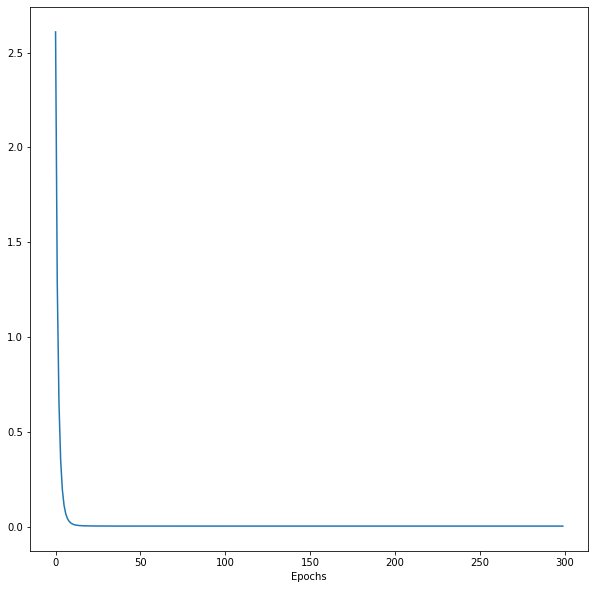

In [409]:
plt.figure(figsize=(10,10))
plt.plot(range(0,300 ), MSE_points)
plt.xlabel('Epochs')
plt.show()

In [169]:
Y_test = pd.DataFrame(Test['Chance_of_Admit'])
Y_pred = pd.DataFrame(Y_pred)
Y_pred = Y_pred.rename(columns={0: 'Predicted Values'})
Y_pred

,Predicted Values
0,0.778835
1,0.681379
2,0.663660
3,0.716818
4,0.929450
...,...
70,0.858572
71,0.902871
72,0.840853
73,0.681379


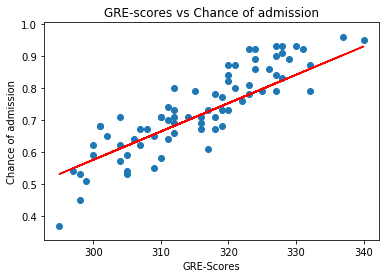

In [170]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred,color = 'r')
plt.xlabel("GRE-Scores")
plt.ylabel("Chance of admission")
plt.title("GRE-scores vs Chance of admission")
plt.show()

In [ ]:
#Kfold function for 1.4 and 1.5

In [358]:
def gimme_kfold(val_set):
    x = np.array(X_train_standardized).reshape(5, 85)
    y = np.array(Y_train).reshape(5, 85)

    xt = []
    yt = []
    xv = pd.DataFrame(x[val_set])
    yv = y[val_set]
    for k in range (5):
        if k != val_set:
            xt.append(x[k])
            yt.append(y[k])
    xt = pd.DataFrame(np.array(xt).reshape(1,340).transpose())
    yt = np.array(yt).reshape(340,1)
    s = pd.Series(yt.tolist())
    yt = []     
    for x in s:
        yt.extend(x)
    yt = pd.Series(yt)
    return xt,xv,yt,yv

In [ ]:
#Implementation of 1.4

In [412]:
alpha = [0.5, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
SSR_list = []
for i in range (5):
    SSR = 0
    for j in range (5):
        xt,xv,yt,yv = gimme_kfold(j)
        w_1 = weights(xt,yt,100,alpha[i])
        Y_PRED = regression_test(xv, w_1)
        SSR += error_function(yv,Y_PRED)
    SSR_list.append(SSR)

In [413]:
tuned_alpha = alpha[SSR_list.index(min(SSR_list))]
print(tuned_alpha)

0.1


In [ ]:
'''
Tuned Alpha Parameter
'''

In [398]:
SSR_list = []
for i in range (50):
    SSR = 0
    for j in range (5):
        xt,xv,yt,yv = gimme_kfold(j)
        w_1 = weights(xt,yt,i+1,0.1)
        Y_PRED = regression_test(xv, w_1)
        SSR += error_function(yv,Y_PRED)
    SSR_list.append(SSR)

In [399]:
epoch = []
for i in range (1,51):
    epoch.append(i)
tuned_epoch_value = epoch[SSR_list.index(min(SSR_list))]
print(tuned_epoch_value)

15


In [ ]:
'''
Tuned Epoch Parameter
'''

In [ ]:
#Implementation of 1.5

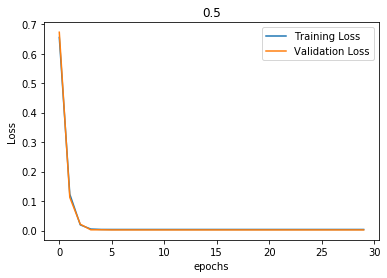

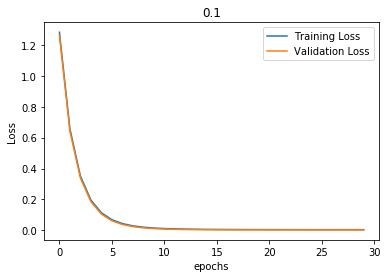

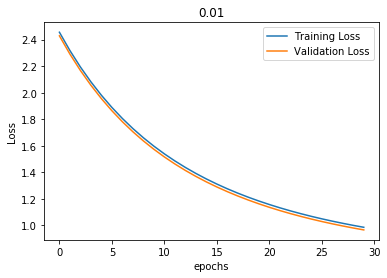

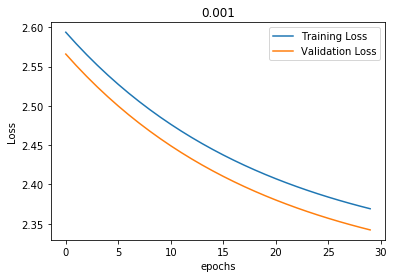

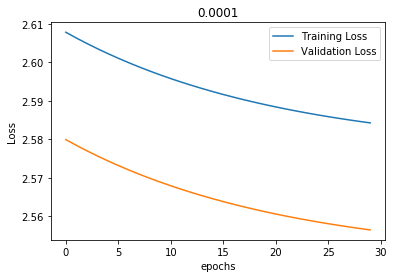

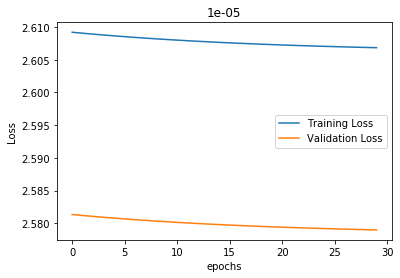

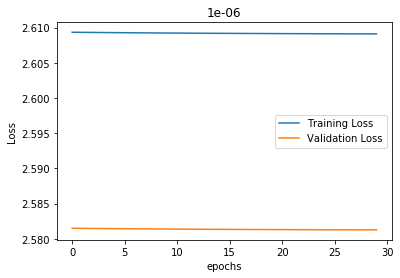

In [393]:
epochs = []
for i in range (30):
    epochs.append(i)
for i in range (len(alpha)):
    Tloss = []
    Vloss = []
    for l in range (len(epochs)):
        tL = 0
        vL = 0
        w_1 = weights(X_train_standardized, Y_train,l+1,alpha[i])
        Y_PRED_t = regression_test(pd.DataFrame(X_train_standardized), w_1)
        Y_PRED_v = regression_test(pd.DataFrame(X_test_standardized), w_1)
        tL += error_function(Y_train,Y_PRED_t)
        vL += error_function(Y_test,Y_PRED_v)
        Tloss.append(tL)
        Vloss.append(vL)
    plt.plot(epochs,Tloss,label = 'Training Loss' )
    plt.plot(epochs,Vloss, label = 'Validation Loss')
    plt.title(alpha[i])
    plt.xlabel('epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [ ]:
#1.6

In [ ]:
'''
Based on results of 1.4 and 1.5, optimal value is 1e^-1 and epcohes around 10
'''

In [ ]:
#Implementation of 1.7

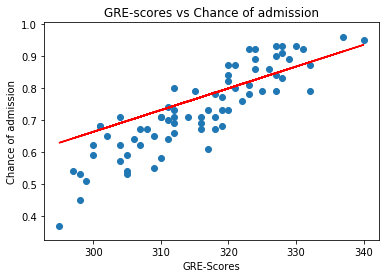

In [85]:
Yp = regression_test(pd.DataFrame(X_test_standardized), weights(X_train_standardized,np.array(Y_train),tuned_epoch_value,tuned_alpha))
plt.scatter(X_test, Y_test)
plt.plot(X_test, Yp,color = 'r')
plt.xlabel("GRE-Scores")
plt.ylabel("Chance of admission")
plt.title("GRE-scores vs Chance of admission")
plt.show()

'''
Chance of admission (predicted variable) is positively correlated to GRE score (feature variable)
'''

In [ ]:
#Importing Data for Part 2 and 3

In [127]:
Test = pd.read_csv('test_set.csv')
Train = pd.read_csv('training_set.csv')
Validation = pd.read_csv('validation_set.csv')

X_test = pd.DataFrame(Test.iloc[:,2:17])
Y_test = Test.new_deaths
X_train = pd.DataFrame(Train.iloc[:,2:17])
Y_train = Train.new_deaths
X_val = pd.DataFrame(Validation.iloc[:,2:17])
Y_val = Validation.new_deaths

In [ ]:
#Implementation of 2.1

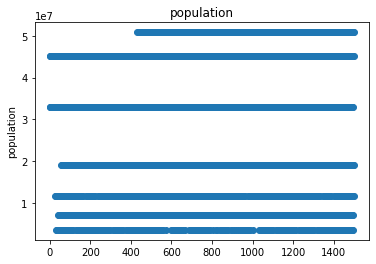

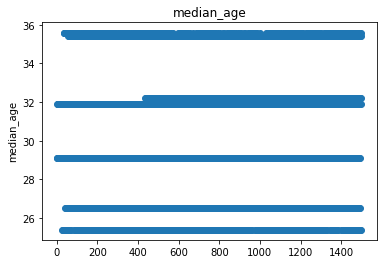

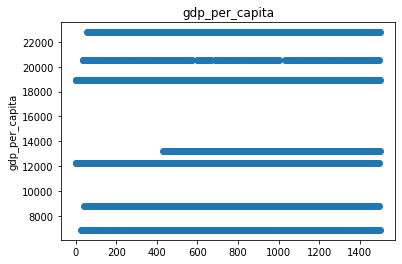

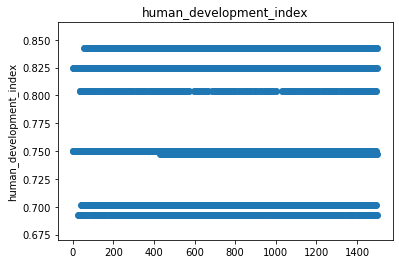

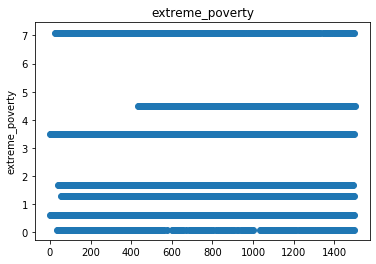

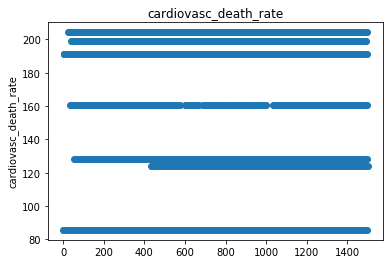

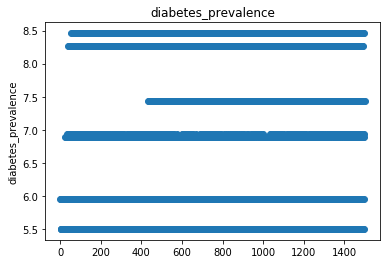

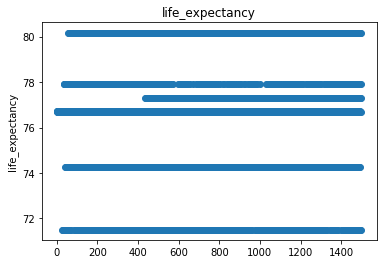

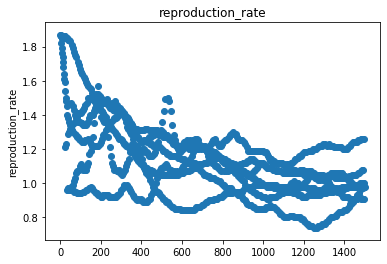

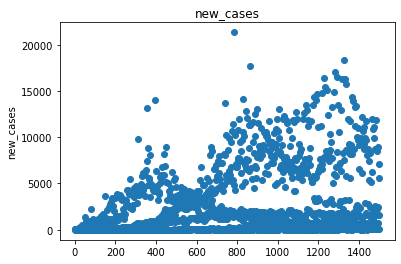

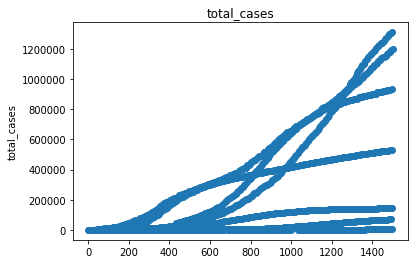

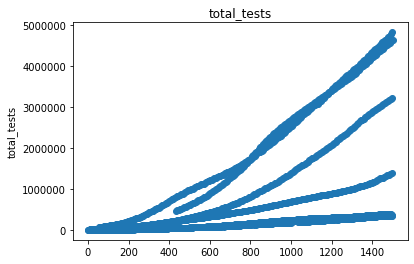

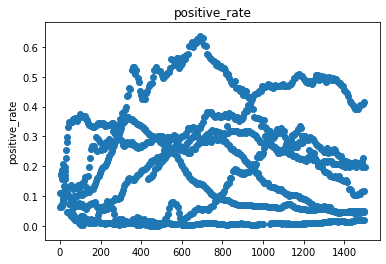

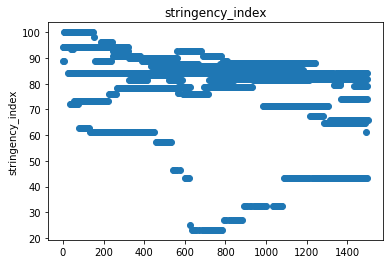

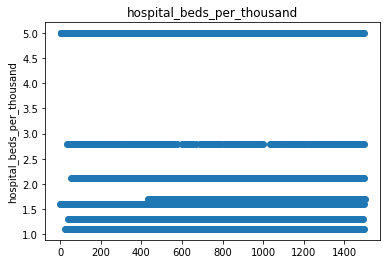

In [5]:
y= np.arange(1,1501)
for i in range (15):
    plt.scatter(x = y , y = X_train.iloc[:,i:i+1])
    for col in X_train.columns:
        my_list = list(X_train)
        plt.ylabel(my_list[i])
        plt.title(my_list[i])
    plt.show()

In [6]:
corrMatrix = Test.corr(method='pearson')
abs(corrMatrix['new_deaths']).sort_values()

gdp_per_capita                0.064420
human_development_index       0.112226
extreme_poverty               0.128948
diabetes_prevalence           0.172977
median_age                    0.196654
hospital_beds_per_thousand    0.230720
life_expectancy               0.231928
stringency_index              0.258123
cardiovasc_death_rate         0.281119
reproduction_rate             0.314451
positive_rate                 0.325454
total_tests                   0.640562
total_cases                   0.818076
population                    0.833025
new_cases                     0.921837
new_deaths                    1.000000
Name: new_deaths, dtype: float64

In [153]:
X_test_u = X_test.drop(['gdp_per_capita', 'human_development_index','extreme_poverty','diabetes_prevalence','median_age'], axis=1)
X_train_u = X_train.drop(['gdp_per_capita', 'human_development_index','extreme_poverty','diabetes_prevalence','median_age'], axis=1)
X_val_u = X_val.drop(['gdp_per_capita', 'human_development_index','extreme_poverty','diabetes_prevalence','median_age'], axis=1)

In [ ]:
#Implementation of 2.2

In [154]:
X_train_standardized = pd.DataFrame((X_train_u - X_train_u .mean()) / X_train_u.std())
X_test_standardized  = (X_test_u - X_train_u.mean()) /  X_train_u.std()
X_val_standardized  = (X_val_u - X_train_u.mean()) /  X_train_u.std()

In [ ]:
#Implementation of 2.3

In [40]:
MSE_points = []
num_iterations = 300
learning_rate = 0.1
w = weights(X_train_standardized,Y_train.transpose(),num_iterations,learning_rate)
Y_pred = regression_test(X_test_standardized,w)
error_function(Y_test,Y_pred)

2155.186704681822

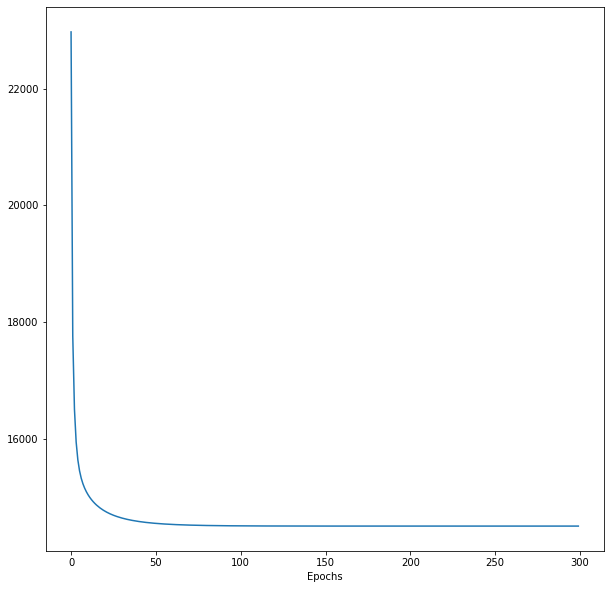

In [42]:
plt.figure(figsize=(10,10))
plt.plot(range(0,300 ), MSE_points)
plt.xlabel('Epochs')
plt.show()

In [62]:
w = weights(X_train_standardized,Y_train.transpose(),num_iterations,learning_rate)
Y_pred = regression_test(X_test_standardized,w)
Y_pred = pd.DataFrame(Y_pred)
Y_pred = Y_pred.rename(columns={0: 'Predicted Values'})
Y_pred

,Predicted Values
0,10.527049
1,9.580677
2,8.857442
3,7.929625
4,11.664652
...,...
195,8.413280
196,9.102796
197,10.825406
198,9.701835


In [ ]:
#Implementation of 2.4

In [31]:
alpha = [0.01, 0.001, 0.0001, 0.00001, 0.000001]
SSR_list = []
for i in range (5):
    SSR = 0
    xt = X_train_standardized
    yt = Y_train
    xv = X_val_standardized
    yv = Y_val
    w_1 = weights(xt,yt,100,alpha[i])
    Y_PRED = regression_test(pd.DataFrame(xv), w_1)
    SSR += error_function(np.array(yv),Y_PRED)
    SSR_list.append(SSR)

In [32]:
tuned_alpha = alpha[SSR_list.index(min(SSR_list))]
print(SSR_list)
print(tuned_alpha)

[1213.740059739272, 3712.3845771658416, 5035.56765809284, 5199.727982917139, 5216.512373655103]
0.01


In [ ]:
'''
Tuned Alpha Parameter
'''

In [43]:
SSR_list = []
for i in range (100):
    SSR = 0
    xt = X_train_standardized
    yt = Y_train
    xv = X_val_standardized
    yv = Y_val
    w_1 = weights(xt,yt,i+1,0.01)
    Y_PRED = regression_test(pd.DataFrame(xv), w_1)
    SSR += error_function(np.array(yv),Y_PRED)
    SSR_list.append(SSR)

In [44]:
epoch = []
for i in range (1,101):
    epoch.append(i)
tuned_epoch_value = epoch[SSR_list.index(min(SSR_list))]
print(tuned_epoch_value)

55


In [ ]:
'''
Tuned Epoch Parameter
'''

In [ ]:
#Implementation of 2.5

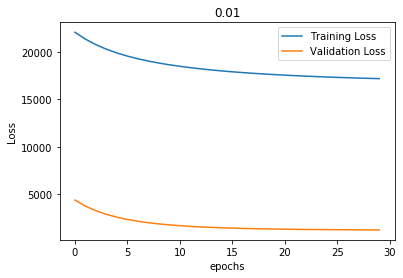

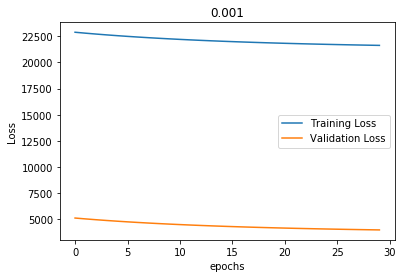

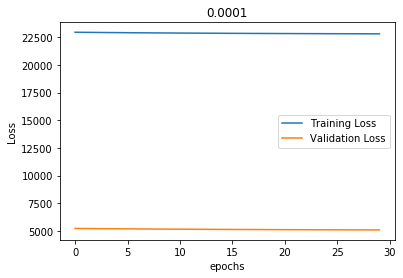

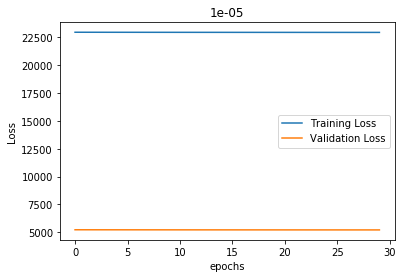

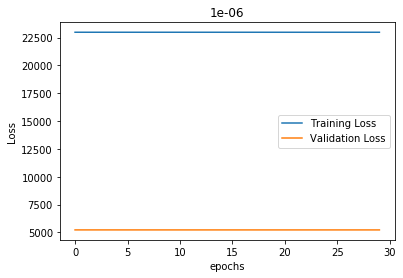

In [39]:
epochs = []
for i in range (30):
    epochs.append(i)
for i in range (len(alpha)):
    Tloss = []
    Vloss = []
    xt = X_train_standardized
    yt = Y_train
    #xt = np.array(xt).reshape(-1,1)
    #yt = pd.DataFrame(yt)
    xv = X_val_standardized
    yv = Y_val
    for l in range (len(epochs)):
        tL = 0
        vL = 0
        w_1 = weights(xt,yt,l+1,alpha[i])
        Y_PRED_t = regression_test(pd.DataFrame(xt), w_1)
        Y_PRED_v = regression_test(pd.DataFrame(xv), w_1)
        tL += error_function(yt,Y_PRED_t)
        vL += error_function(yv,Y_PRED_v)
        Tloss.append(tL)
        Vloss.append(vL)
    plt.plot(epochs,Tloss,label = 'Training Loss' )
    plt.plot(epochs,Vloss, label = 'Validation Loss')
    plt.title(alpha[i])
    plt.xlabel('epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [ ]:
#2.6

In [ ]:
'''
Based on results of 2.3 and 2.4, optimal value is 1e^-2 and epcohes around 50
'''

In [ ]:
#Standardizing Data for Part 3

In [159]:
X_train_standardized = pd.DataFrame((X_train - X_train .mean()) / X_train.std())
X_test_standardized  = (X_test - X_train.mean()) /  X_train.std()
X_val_standardized  = (X_val - X_train.mean()) /  X_train.std()

In [ ]:
#Implementation of 3.1

In [162]:
List = [l*0.1 for l in range(0,10000)] 

lr = LinearRegression()
lr.fit(X_train, Y_train)
pred_train_lr= lr.predict(X_train)
pred_test_lr= lr.predict(X_val)
print(metrics.mean_squared_error(Y_val,pred_test_lr))

MSE_r = []
MSE_l = []
MSE_e = []

for l in List:
    
    rr = Ridge(alpha=l)
    rr.fit(X_train_standardized, Y_train) 
    pred_train_rr= rr.predict(X_train_standardized)
    pred_test_rr= rr.predict(X_val_standardized)
    MSE_r.append(metrics.mean_squared_error(Y_val,pred_test_rr))

    model_lasso = Lasso(alpha=l)
    model_lasso.fit(X_train_standardized, Y_train) 
    pred_train_lasso= model_lasso.predict(X_train_standardized)
    pred_test_lasso= model_lasso.predict(X_val_standardized)
    MSE_l.append(metrics.mean_squared_error(Y_val,pred_test_lasso))
    
    model_enet = ElasticNet(alpha=l)
    model_enet.fit(X_train_standardized, Y_train) 
    pred_train_enet= model_enet.predict(X_train_standardized)
    pred_test_enet= model_enet.predict(X_val_standardized)
    MSE_e.append(metrics.mean_squared_error(Y_val,pred_test_enet))

tuned_lambda_r = List[MSE_r.index(min(MSE_r))]
print(min(MSE_r))
print(tuned_lambda_r)

tuned_lambda_l = List[MSE_l.index(min(MSE_l))]
print(min(MSE_l))
print(tuned_lambda_l)

tuned_lambda_e = List[MSE_e.index(min(MSE_e))]
print(min(MSE_e))
print(tuned_lambda_e)

1888.0950941571368
1006.3225127461592
112.5
1089.3403587634175
20.700000000000003
1028.7547302354824
0.2


In [ ]:
'''
MSE of Linear regression

followed by

MSE and optimal regularization parameter

of

Ridge, Lasso and Elestic Net Regression

respectively
'''

In [ ]:
#3.2

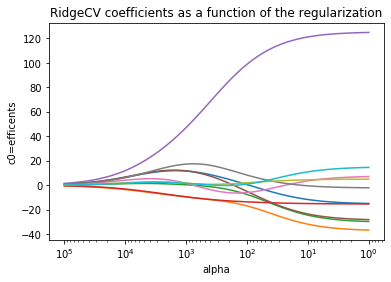

In [155]:
n_alphas = 100
alphas = np.logspace(0.001,5, n_alphas)
coefs = []
for a in alphas:
    ridge = linear_model.RidgeCV(alphas=[a], fit_intercept=True, cv=5)
    ridge.fit(X_train_standardized, Y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alpha')
plt.ylabel('c0=efficents')
plt.title('RidgeCV coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

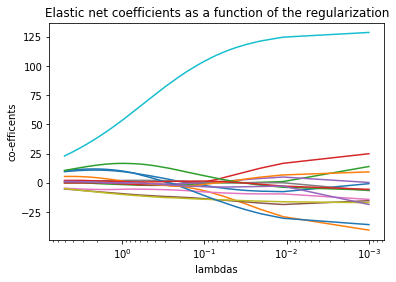

In [161]:
n_alphas = 500
alphas = np.linspace(0.001,5, n_alphas)
coefs = []
for a in alphas:
    r = linear_model.ElasticNetCV(alphas=[a])
    r.fit(X_train_standardized, Y_train)
    coefs.append(r.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('lambdas')
plt.ylabel('co-efficents')
plt.title('Elastic net coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [ ]:
#3.3

In [163]:
rr = Ridge(alpha=tuned_lambda_r)
rr.fit(X_train_standardized, Y_train) 
pred_train_rr= rr.predict(X_train_standardized)
pred_test_rr= rr.predict(X_test_standardized)
print(metrics.mean_squared_error(Y_test,pred_test_rr))
    
model_lasso = Lasso(alpha=tuned_lambda_l)
model_lasso.fit(X_train_standardized, Y_train) 
pred_train_lasso= model_lasso.predict(X_train_standardized)
pred_test_lasso= model_lasso.predict(X_test_standardized)
print(metrics.mean_squared_error(Y_test,pred_test_lasso))
    
model_enet = ElasticNet(alpha = tuned_lambda_e)
model_enet.fit(X_train_standardized, Y_train) 
pred_train_enet= model_enet.predict(X_train_standardized)
pred_test_enet= model_enet.predict(X_test_standardized)
print(metrics.mean_squared_error(Y_test,pred_test_enet))

2648.083410490034
3601.716006338026
2743.640320112129


In [ ]:
'''
MSE of Ridge, Lasso and Elastic net Regression respectively

using their optimal regularization parameters
'''